# Support Vector Classifier

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Creating the synethetic data points

from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples = 2000, n_features = 2, n_classes=2, n_clusters_per_class=2,n_redundant = 0)
X

array([[ 0.98695522, -0.83825165],
       [ 1.3444034 , -0.10766548],
       [ 1.01439007, -0.90551536],
       ...,
       [-0.27104765,  2.02292262],
       [-0.80747203, -0.90016148],
       [-0.24963628,  1.57313966]])

In [4]:
y

array([0, 1, 0, ..., 1, 0, 1])

In [5]:
pd.DataFrame(X)[0]

0       0.986955
1       1.344403
2       1.014390
3       1.195107
4       1.040468
          ...   
1995   -0.596380
1996   -0.377239
1997   -0.271048
1998   -0.807472
1999   -0.249636
Name: 0, Length: 2000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

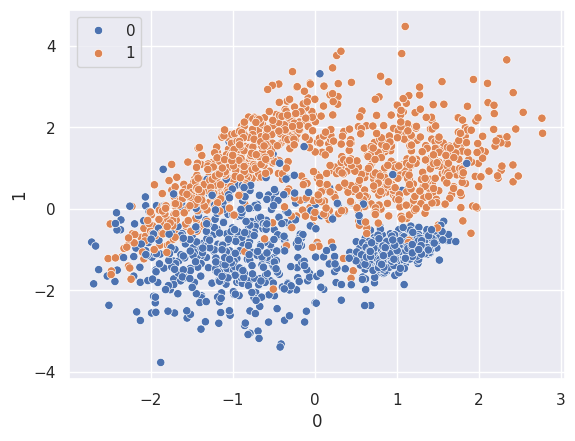

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
svc_x_train,svc_x_test,svc_y_train,svc_y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [8]:
print(svc_x_train.shape)
print(svc_y_train.shape)
print(svc_x_test.shape)
print(svc_y_test.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


In [9]:
# Model Building

from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc

SVC(kernel='linear')

In [10]:
# Fit the model

svc.fit(svc_x_train, svc_y_train)

SVC(kernel='linear')

In [11]:
svc.coef_

array([[-0.08033943,  1.7219822 ]])

In [12]:
# Prediction

y_pred = svc.predict(svc_x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_pred,svc_y_test))
print(confusion_matrix(y_pred,svc_y_test))
print(accuracy_score(y_pred,svc_y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       193
           1       0.91      0.91      0.91       207

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

[[175  18]
 [ 18 189]]
0.91


In [18]:
# Hyperparameter Tuning with Support Vector Classifier

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear']}

In [19]:
svc_grid = GridSearchCV(SVC(),param_grid=param_grid, refit=True, cv=5, verbose=3)
svc_grid.fit(svc_x_train,svc_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.897 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.881 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.903 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.884 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.897 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.881 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.903 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.884 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
svc_grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
#Prediction

svcgrid_y_pred = svc_grid.predict(svc_x_test)
print(classification_report(svcgrid_y_pred,svc_y_test))
print(confusion_matrix(svcgrid_y_pred,svc_y_test))
print(accuracy_score(svcgrid_y_pred,svc_y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       193
           1       0.91      0.91      0.91       207

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

[[175  18]
 [ 18 189]]
0.91


# Support Vector Regressor

In [23]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)
X

array([[-0.35790246, -0.4515004 ],
       [ 2.00671075,  1.33080812],
       [-0.61013868,  1.3349281 ],
       ...,
       [ 2.11946153,  1.14325143],
       [ 0.1095293 ,  0.54314379],
       [ 0.08090127, -0.50623924]])

In [25]:
y.shape

(1000,)

In [26]:
pd.DataFrame(X)[0]

0     -0.357902
1      2.006711
2     -0.610139
3     -0.776348
4     -1.959013
         ...   
995    0.827701
996    0.967289
997    2.119462
998    0.109529
999    0.080901
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

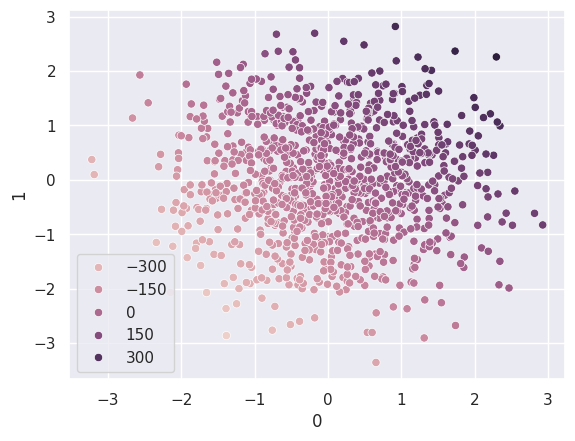

In [27]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

In [28]:
svr_x_train,svr_x_test,svr_y_train,svr_y_test = train_test_split(X,y,test_size = 0.25,random_state = 29)

In [29]:
print(svr_x_train.shape)
print(svr_x_test.shape)
print(svr_y_train.shape)
print(svr_y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [30]:
# Model Building

from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr

SVR(kernel='linear')

In [32]:
svr.fit(svr_x_train,svr_y_train)

SVR(kernel='linear')

In [34]:
print(svr.coef_)

[[98.63069988 90.55617472]]


In [39]:
# Prediction

svr_y_pred = svc_grid.predict(svr_x_test)
svr_y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0])

In [40]:
from sklearn.metrics import r2_score

In [42]:
print(r2_score(svr_y_test,svr_y_pred))

-0.0026494587079044507
